In [1]:
from mdagent import MDAgent

In [2]:
#todays date and time
import datetime

start = datetime.datetime.now()
date = start.strftime("%Y-%m-%d")
print("date:",date)
time = start.strftime("%H:%M:%S")
print("time:",time)

date: 2024-09-30
time: 21:35:16


In [3]:
descriptive_prompt_7 = "Complete the following MD tasks: 1. Download the PDB file for 1MBN. 2. Preprocess the file by adding missing atoms, hydrogens and replacing non-standard residues. 3. Simulate for 1 ps at 300 K and 400 K. 4. Calculate the RMSD for each simulation. 5. Analyze the secondary structure for each simulation."
non_descriptive_prompt_7 = "Simulate PDB ID 1MBN at two different temperatures: 300K, 400K for 1 ps each. Plot RMSD of both over time, and compare the final secondary structures at the end of the simulations. "

In [4]:
llm_model = "gpt-4o-2024-08-06"
tools = "all"

In [5]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)

##### descriptive prompt

In [6]:
start1 = datetime.datetime.now()
agent_1.run(descriptive_prompt_7)

Thought: I will start by downloading the PDB file for 1MBN. Once I have the file, I will preprocess it by adding missing atoms, hydrogens, and replacing non-standard residues. After preprocessing, I will set up and run simulations at 300 K and 400 K. Finally, I will calculate the RMSD and analyze the secondary structure for each simulation.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "1MBN"
  }
}
```PDB file found with this ID: 1MBN
Thought: Now that I have downloaded the PDB file for 1MBN, I will proceed to preprocess the file by adding missing atoms, hydrogens, and replacing non-standard residues. This will prepare the file for the subsequent simulations.

Action:
```
{
  "action": "CleaningToolFunction",
  "action_input": {
    "pdb_id": "1MBN_213520",
    "replace_nonstandard_residues": true,
    "add_missing_atoms": true,
    "remove_heterogens": false,
    "remove_water": false,
    "add_hydrogens": true,
    "add_hydrogens_ph": 7.0
  }
}
```f

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [7]:
end = datetime.datetime.now()
elapsed = end - start1
print(f"agent_1 duration: {elapsed.total_seconds()/60:.2f} minutes")

agent_1 duration: 2.56 minutes


In [8]:
registry = agent_1.path_registry
all_names = registry.list_path_names()
print(all_names)

Names found in registry: 1MBN_213520, 1MBN_213523, 1MBN_213532, 1MBN_213537, top_sim0_213541, sim0_213541, rec0_213542, rec1_213542, rec2_213542, top_sim0_213628, sim0_213628, rec0_213628, rec1_213628, rec2_213628, rmsd_213541, fig0_213720, rmsd_213628, fig0_213722, rec0_213745, rec0_213747


In [9]:
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 1MBN_213520: PDB file downloaded from RSCB
 PDBFile ID: 1MBN_213520
 1MBN_213523: Cleaned File:  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 1MBN_213532: Cleaned File:  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 1MBN_213537: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_213541: Initial positions for simulation sim0_213541
 sim0_213541: Basic Simulation of Protein 1MBN_213537
 rec0_213542: Simulation trajectory for protein 1MBN_213537 and simulation sim0_213541
 rec1_213542: Simulation state log for protein 1MBN_213537 and simulation sim0_213541
 rec2_213542: Simulation pdb frames for protein 1MBN_213537 and simulation sim0_213541
 top_sim0_213628: Initial positions for simulation sim0_21362

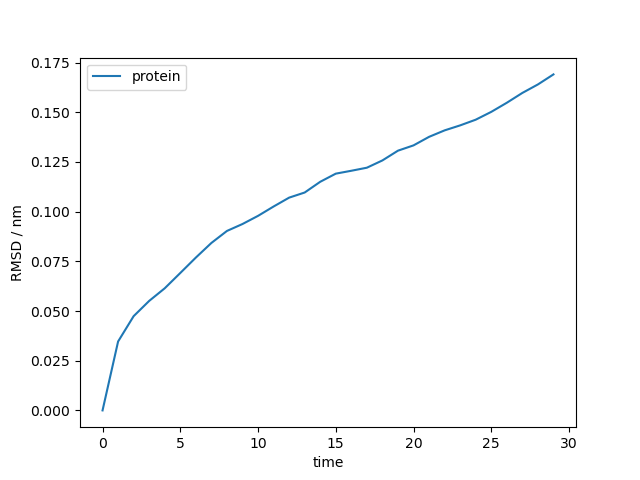

In [11]:
#plotting rmsd of both simulations
from IPython.display import Image
rmsd1ID = 'fig0_093838'
rmsd2ID = 'fig0_093836'
path1 = registry.get_mapped_path(rmsd1ID)
path2 = registry.get_mapped_path(rmsd2ID)

Image(filename=path1)

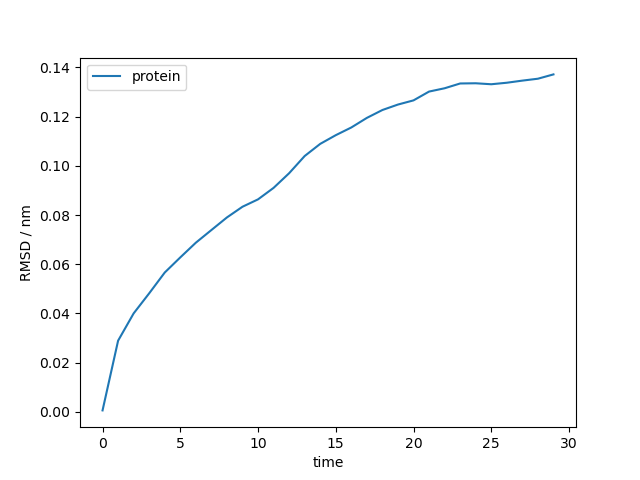

In [12]:
Image(filename=path2)

##### non-descriptive prompt

In [13]:
#todays date and time
import datetime

start = datetime.datetime.now()
date = start.strftime("%Y-%m-%d")
print("date:",date)
time = start.strftime("%H:%M:%S")
print("time:",time)

date: 2024-09-26
time: 11:57:12


In [14]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)

In [15]:
start2 = datetime.datetime.now()
agent_2.run(non_descriptive_prompt_7)

Thought: To address the question, I need to perform the following steps:

1. Download the PDB file for 1MBN.
2. Set up and run simulations at 300K and 400K for 1 ps each.
3. Compute and plot the RMSD over time for both simulations.
4. Compare the final secondary structures at the end of the simulations.

I will start by downloading the PDB file for 1MBN.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "1MBN"
  }
}
```PDB file found with this ID: 1MBN
To proceed, I need to set up and run simulations for the PDB ID 1MBN at two different temperatures: 300K and 400K, each for 1 ps. I will start by setting up the simulation at 300K.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1MBN_115715",
    "forcefield_files": ["amber99sb.xml", "tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "HBonds",
      "rigidWater": true
    },
    "integrator_params": {
      "i

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [16]:
end = datetime.datetime.now()
elapsed = end - start2
print(f"agent_2 duration: {elapsed.total_seconds()/60:.2f} minutes")

agent_2 duration: 1.12 minutes


In [17]:
registry = agent_2.path_registry
all_names = registry.list_path_names()
print(all_names)

Names found in registry: 1MBN_115715, 1MBN_115726, top_sim0_115729, sim0_115729, rec0_115729, rec1_115729, rec2_115729, top_sim0_115749, sim0_115749, rec0_115749, rec1_115749, rec2_115749, rmsd_115729, fig0_115806, rmsd_115749, fig0_115808, rec0_115810, rec0_115815


In [18]:
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 1MBN_115715: PDB file downloaded from RSCB
 PDBFile ID: 1MBN_115715
 1MBN_115726: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_115729: Initial positions for simulation sim0_115729
 sim0_115729: Basic Simulation of Protein 1MBN_115726
 rec0_115729: Simulation trajectory for protein 1MBN_115726 and simulation sim0_115729
 rec1_115729: Simulation state log for protein 1MBN_115726 and simulation sim0_115729
 rec2_115729: Simulation pdb frames for protein 1MBN_115726 and simulation sim0_115729
 top_sim0_115749: Initial positions for simulation sim0_115749
 sim0_115749: Basic Simulation of Protein 1MBN_115726
 rec0_115749: Simulation trajectory for protein 1MBN_115726 and simulation sim0_115749
 rec1_115749: Simulation state log for protein 1MBN_115726 and simulation sim0_115749
 rec2_115749: Simulation pdb frames for protein 1MBN_1157

In [19]:
#plotting rmsd of both simulations
from IPython.display import Image
rmsd1ID = 'fig0_062655'
rmsd2ID = 'fig0_062658'
path1 = registry.get_mapped_path(rmsd1ID)
path2 = registry.get_mapped_path(rmsd2ID)

Image(filename=path1)

ValueError: Cannot embed the '' image format

In [ ]:
Image(filename=path2)

In [ ]:
import mdtraj as md
import numpy as np

traj_path = registry.get_mapped_path("rec0_062543")
top_path = registry.get_mapped_path("top_sim0_062542")
traj = md.load(traj_path, top=top_path)

# Compute the secondary structure of the trajectory
dssp_final = md.compute_dssp(traj[-1], simplified=True)
dssp_initial = md.compute_dssp(traj[0], simplified=True)

print('Computing DSSP for 1MBN at 300K')

print('=== BEFORE ===')
print("Number of initial sheets: ",len([i for i in dssp_initial[0] if i == 'E']))
print("Number of initial helices: ",len([i for i in dssp_initial[0] if i == 'H']))
print("Number of initial coils: ",len([i for i in dssp_initial[0] if i == 'C']))

print('=== AFTER ===')
print("Number of final sheets: ",len([i for i in dssp_final[0] if i == 'E']))
print("Number of final helices: ",len([i for i in dssp_final[0] if i == 'H']))
print("Number of final coils: ",len([i for i in dssp_final[0] if i == 'C']))

In [ ]:
import mdtraj as md
import numpy as np

traj_path = registry.get_mapped_path("rec0_062614")
top_path = registry.get_mapped_path("top_sim0_062613")
traj = md.load(traj_path, top=top_path)

# Compute the secondary structure of the trajectory
dssp_final = md.compute_dssp(traj[-1], simplified=True)
dssp_initial = md.compute_dssp(traj[0], simplified=True)

print('Computing DSSP for 1MBN at 400K')

print('=== BEFORE ===')
print("Number of initial sheets: ",len([i for i in dssp_initial[0] if i == 'E']))
print("Number of initial helices: ",len([i for i in dssp_initial[0] if i == 'H']))
print("Number of initial coils: ",len([i for i in dssp_initial[0] if i == 'C']))

print('=== AFTER ===')
print("Number of final sheets: ",len([i for i in dssp_final[0] if i == 'E']))
print("Number of final helices: ",len([i for i in dssp_final[0] if i == 'H']))
print("Number of final coils: ",len([i for i in dssp_final[0] if i == 'C']))